<!--NOTEBOOK_HEADER-->
*This notebook contains course material from [CBE 20255 Introduction to Chemical Engineering Analysis](http://jckantor.github.io/CBE20255/) 
by Jeffrey Kantor (jeff at nd.edu); the content is available [on GitHub](https://github.com/jckantor/CBE20255).
The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode),
and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


<!--NAVIGATION-->
< [Stoichiometry](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/02.00-Stoichiometry.ipynb) | [Contents](toc.ipynb) | [Generation Consumption Analysis](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/02.02-Generation-Consumption-Analysis-for-Ammonia-Production.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE20255/blob/master/notebooks/02.01-Balancing-Reactions.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Balancing Reactions

## Summary

This [Jupyter notebook](http://jupyter.org/notebook.html) demonstrates the balancing of chemical reactions using  principles of reaction stoichiometry. After completing this notebook, you should know

* the definition of stoichiometric coefficient,
* a reaction is _balanced_ when the number of atomic species and electric charge are conserved in the reaction,
* how to solve for stoichiometric coefficients by hand,
* how to solve for stoichiometric coefficients as the solution to a system of linear equations.

## Stoichiometry

Stoichiometry is the quantitative analysis of chemical reactions. Stoichiometry provides a set of analytical tools essential to the design of chemical processes. One of the basic calculations of stoichiometry is to balance a chemical reaction.

The following screencast reviews what you probably learned in the past as a method for balancing reactions.

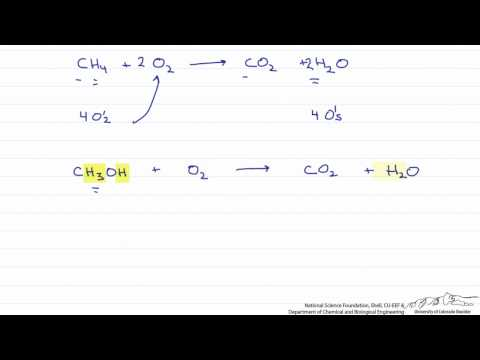

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("e8cUyGBt8e8",560,315,start=0,end=108,rel=0)

In process and bioengineering applications, however, we often deal with large and complex networks of reactions. For these applications it is important to have a more structured approach that is amenable to computations.

## Stoichiometric Coefficients

A chemical reaction is commonly expressed as a formula of the type

$$ a\,A + b\,B \longrightarrow c\,C + d\,D $$

where $A$, $B$, $C$, and $D$ are the molecular species involved in the reaction, and the coefficients $a$, $b$, $c$, and $d$ indicate the molar quantities of each species on each sides of the reaction. In this convention, the coefficients $a$, $b$, $c$, and $d$ are all positive numbers. The reactants are on the left side of the reaction, the products are on the right.

A _balanced reaction_  shows the molecular identity of compounds involved in the reactio. The stoichiometric coefficients

1. show the molar quantity of the compounds involved in the reaction,
2. conserve the total number of each type of atom between reactants and products,
3. conserve total electrical charge, and
4. conserve mass.

The last property, the conservation of mass in a balanced chemical reaction, is a consequence of the conservation of atomic species.

An alternative convention for expressing a balanced reaction is

$$ \nu_A\,A + \nu_B\,B + \nu_C\,C + \nu_D\,D = 0 $$

where the stoichiometric coefficients $\nu_A$, $\nu_B$, $\nu_C$, and $\nu_D$ may take on positive or negative values. Negative coeifficients correspond to reactants, positive coefficients to products. The advantage of this notation will be become clear below where show how to setup algebraic equations correponding to the conditions for a balanced reaction.

## Examples 

### Combustion of Methane

The unbalanced reaction for the combustion of methane (\\( CH_4\\) ) is 

$$ CH_4 + O_2 \rightarrow CO_2 + H_2O $$

What we seek are a set of _stoichiometric coefficients_ for the balanced reaction. The stoichiometric coefficients are numbers \\(\nu_s\\) associated with each species $s$ such that the chemical expression can be written as a formula

$$ \nu_{CH_4}CH_4 + \nu_{O_2}O_2 + \nu_{CO_2}CO_2 + \nu_{H_2O}H_2O = 0  $$

Negative stoichiometric coefficients correspond to reactants, positive stoichiometric coefficeints correspond to products of the reaction. The stoichiometric coefficients must conserve the number of atoms of each element appearing in the reaction, and electrical charge if the reaction involves charged species.

One means of computing the stoichiometric coefficients is to use the [SymPy](http://sympy.org/en/index.html) package for symbolic calculations to set up and solve the atom and charge balances corresponding to a chemical reaction. 

For the computation, The first step is to import the sympy package into the current workspace. The next step is to introduce a stoichiometric coefficient for each chemical species participating in the reaction, and a list of atom balances expressed in terms of the stoichiometric coefficients. There is one atom balance for each atomic species appearing in the reaction. Each atom balance consists of an expression that will be zero for a balanced reaction.

In [2]:
import sympy

sympy.var(['vCH4', 'vO2', 'vCO2', 'vH2O'])

atomBalances = [
    sympy.Eq(vCH4 + vCO2,0),             # Carbon
    sympy.Eq(4*vCH4 + 2*vH2O,0),         # Hydrogen
    sympy.Eq(2*vO2 + +2*vCO2 + vH2O,0)   # Oxygen
]

for eqn in atomBalances:
    print(eqn)

Eq(vCH4 + vCO2, 0)
Eq(4*vCH4 + 2*vH2O, 0)
Eq(2*vCO2 + vH2O + 2*vO2, 0)


A unique solution is obtained by specifying a _basis_ for the reaction. The basis is an additional equation that determines the stoichiometric coefficient for a particular chemical species. In this case, since this example refers to the combustion of methane, an obvious basis is to set the stoichiometric coefficient of methane to -1.

In [3]:
basis = [sympy.Eq(vCH4,-1)]

for eqn in atomBalances + basis:
    print(eqn)

sympy.solve(atomBalances + basis)

Eq(vCH4 + vCO2, 0)
Eq(4*vCH4 + 2*vH2O, 0)
Eq(2*vCO2 + vH2O + 2*vO2, 0)
Eq(vCH4, -1)


{vH2O: 2, vCO2: 1, vCH4: -1, vO2: -2}

### Hypergolic Reactions

<div style="float: right; margin: 10px; width: 160px; font-size: 80%; line-height: 120%;">
<a href="http://en.wikipedia.org/wiki/Monomethylhydrazine"><img src="http://upload.wikimedia.org/wikipedia/commons/8/83/Methylhydrazine-3D-balls.png" alt="Ball and stick model of monomethylhydrazine"></a><br>"<a href="http://commons.wikimedia.org/wiki/File:Methylhydrazine-3D-balls.png#/media/File:Methylhydrazine-3D-balls.png">Methylhydrazine-3D-balls</a>". Licensed under Public Domain via <a href="//commons.wikimedia.org/wiki/">Wikimedia Commons</a>.
</div>
Hypergolic reactions are reactions where the reactants spontaneously ignite. They are frequently used in space propulsion where it desired to have a thruster that can be readily controlled over a range of operating conditions. 

One example is the reaction of the fuel monomethylhydrazine (MMH) fuel with the oxidizer nitrogen tetraoxide that is used in the SuperDraco engine developed by SpaceX, and in the reaction control system and orbital maneuvering systems of the Space Shuttle. 

The **unbalanced** reaction is given by

$$ CH_6N_2 + N_2O_4 \rightarrow CO_2 + NO + H_2O $$

Determine the stoichiometric coefficients for a balanced reaction.  How much oxidizer is required per kilogram of fuel?

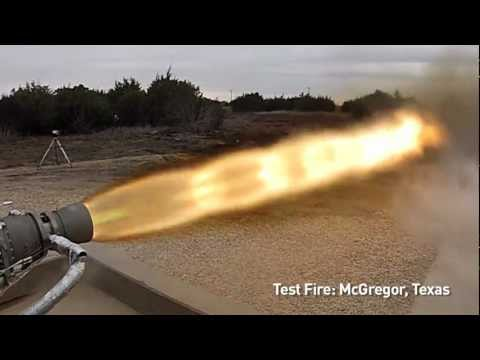

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("VP_kGlmOH9U",560,315,start=0,end=108,rel=0)

In [5]:
# Identify unknown stoichiometric coefficients
sympy.var(['vCH6N2','vN2O4','vCO2','vNO','vH2O'])

# Atom balances
eqns = [
    sympy.Eq(1*vCH6N2 + vCO2,0),                # Carbon
    sympy.Eq(6*vCH6N2 + 2*vH2O,0),              # Hydrogen
    sympy.Eq(4*vN2O4 + 2*vCO2 + vNO + vH2O,0),  # Oxygen
    sympy.Eq(2*vN2O4 + vNO,0)                   # Nitrogen
]

# Basis
eqns.append(sympy.Eq(vCH6N2,-1))

for eqn in eqns:
    print(eqn)

soln = sympy.solve(eqns)
print("\nStoichiometric Coefficients: ", soln)

mwN2O4 = 92.011
mwCH6N2 = 46.07

nCH6N2 = 1.0/mwCH6N2                         # kg-mol of MMH
nN2O4 =  (soln[vN2O4]/soln[vCH6N2])*nCH6N2   # kg-mol of N2O4
mN2O4 = mwN2O4*nN2O4                         # kg of N2O4

print("\n{0:7.3f} kilograms of N2O4 required per kilogram of CH6N2".format(mN2O4))

Eq(vCH6N2 + vCO2, 0)
Eq(6*vCH6N2 + 2*vH2O, 0)
Eq(2*vCO2 + vH2O + 4*vN2O4 + vNO, 0)
Eq(2*vN2O4 + vNO, 0)
Eq(vCH6N2, -1)

Stoichiometric Coefficients:  {vH2O: 3, vN2O4: -5/2, vCO2: 1, vCH6N2: -1, vNO: 5}

  4.993 kilograms of N2O4 required per kilogram of CH6N2


### Reaction with Charge in Aqueous Solution

Metallic cadmium ($Cd$) will dissolve in concentrated solution of nitric acid to form the ion $Cd^{+2}$ with the production of the free radical nitric oxide ($NO$). Write a balanced reaction.

The statement of the problem suggests the unbalanced reaction

$$Cd + NO_3^- \longrightarrow Cd^{+2} + NO$$

but clearly this can't be balanced because there are no offsetting negative charges on the right hand side of the equation. In problems like this need to incorporate other ions and water into the reaction. For this case, there are a total of eight molecular species to consider are

$$Cd,\ H_2O,\ HNO_3,\ NO,\ Cd^{+2},\ H^+,\ OH^-,\ NO_3^-$$

Next we write down the atom balances (4), charge balance (1), and basis specification (1) to create a list of six equations in the eight stoichiometic coefficients.

In [6]:
# Identify unknown stoichiometric coefficients
v = sympy.var(['vCd','vH2O','vHNO3','vNO','vCdpos2','vHpos','vOHneg','vNO3neg'])

# Atom balances
eqns = [
    sympy.Eq(vCd + vCdpos2, 0),                             # Cadmium
    sympy.Eq(2*vH2O + vHNO3 + vHpos + vOHneg, 0),           # Hydrogen
    sympy.Eq(vH2O + 3*vHNO3 + vNO + vOHneg + 3*vNO3neg, 0), # Oxygen
    sympy.Eq(vHNO3  + vNO + vNO3neg, 0)                     # Nitrogen
]

# Charge balance
eqns.append(sympy.Eq(2*vCdpos2 + vHpos - vOHneg - vNO3neg, 0))

# Basis
eqns.append(sympy.Eq(vCd, -1))

for eqn in eqns:
    print(eqn)

Eq(vCd + vCdpos2, 0)
Eq(2*vH2O + vHNO3 + vHpos + vOHneg, 0)
Eq(vH2O + 3*vHNO3 + vNO + 3*vNO3neg + vOHneg, 0)
Eq(vHNO3 + vNO + vNO3neg, 0)
Eq(2*vCdpos2 + vHpos - vNO3neg - vOHneg, 0)
Eq(vCd, -1)


This problems has more variables than equations, so there some _degrees of freedom_. We need to make some additional assumptions about this reaction to resolve those degrees of freedom. The first assumption is that the nitric acid is completely dissociated in solution so that $\nu_{HNO_3}=0$.

In [7]:
eqns.append(sympy.Eq(vHNO3, 0))
sympy.solve(eqns)


{vHpos: vOHneg - 8/3,
 vCd: -1,
 vCdpos2: 1,
 vH2O: -vOHneg + 4/3,
 vHNO3: 0,
 vNO3neg: -2/3,
 vNO: 2/3}

This partial solution shows that remaining six stoichiometric coefficients can be written in terms of $\nu_{OH^-}$. What's happening is that there is a second reaction, the dissociation of water

$$H_2O \longrightarrow H^+ + OH^-$$

that is taking place among the same list of reactants. In order to separate the two reactions, we set $\nu_{H_2O} = 0$

In [8]:
sympy.solve(eqns + [sympy.Eq(vH2O,0)])


{vOHneg: 4/3,
 vHpos: -4/3,
 vCdpos2: 1,
 vH2O: 0,
 vHNO3: 0,
 vCd: -1,
 vNO3neg: -2/3,
 vNO: 2/3}

which gives the resulting balanced equation

$$ Cd + \frac{4}{3}\,H^+ + \frac{2}{3}\,NO_3^- \longrightarrow Cd^{+2} + \frac{4}{3}\,OH^- + \frac{2}{3}\,NO $$

## Exercises

### Combustion of Octane

Extend this example to balance the reaction for the combustion of octane $C_8H_{18}$.

### Hard to Balance Reaction

Balance the following reaction:

$$ HIO_3 + FeI_2 + HCl \longrightarrow FeCl_3 + ICl + H_2O $$

### Another Hard to Balance Reaction

Balance the following reaction:

$$ K_4[Fe(SCN)_6] + K_2Cr_2O_7 + H_2SO_4 \longrightarrow Fe_2(SO_4)_3 + Cr_2(SO_4)_3 + CO_2 + H_2O + K_2SO_4 + KNO_3 $$

### Reactions with Charge

Given the unbalanced equation

$$MnO_4^- + I^- \longrightarrow Mn^{+2} + I_2$$

find the balanced reaction assuming it takes place in an acidic, aqueous solution.

<!--NAVIGATION-->
< [Stoichiometry](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/02.00-Stoichiometry.ipynb) | [Contents](toc.ipynb) | [Generation Consumption Analysis](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/02.02-Generation-Consumption-Analysis-for-Ammonia-Production.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE20255/blob/master/notebooks/02.01-Balancing-Reactions.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>